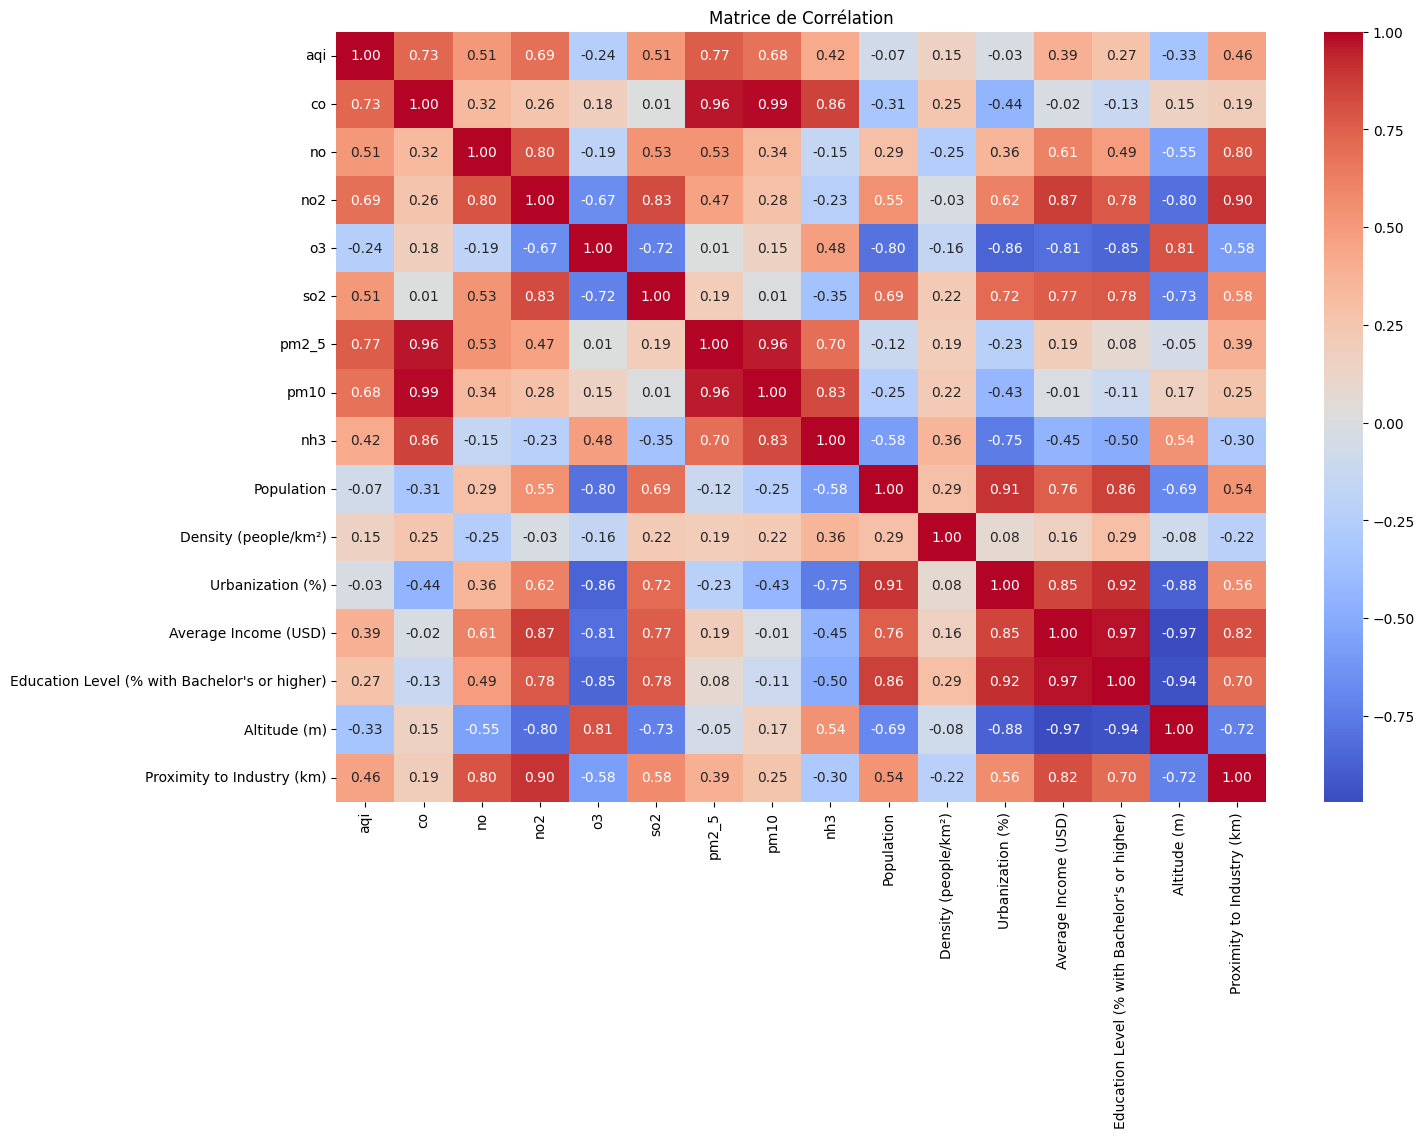

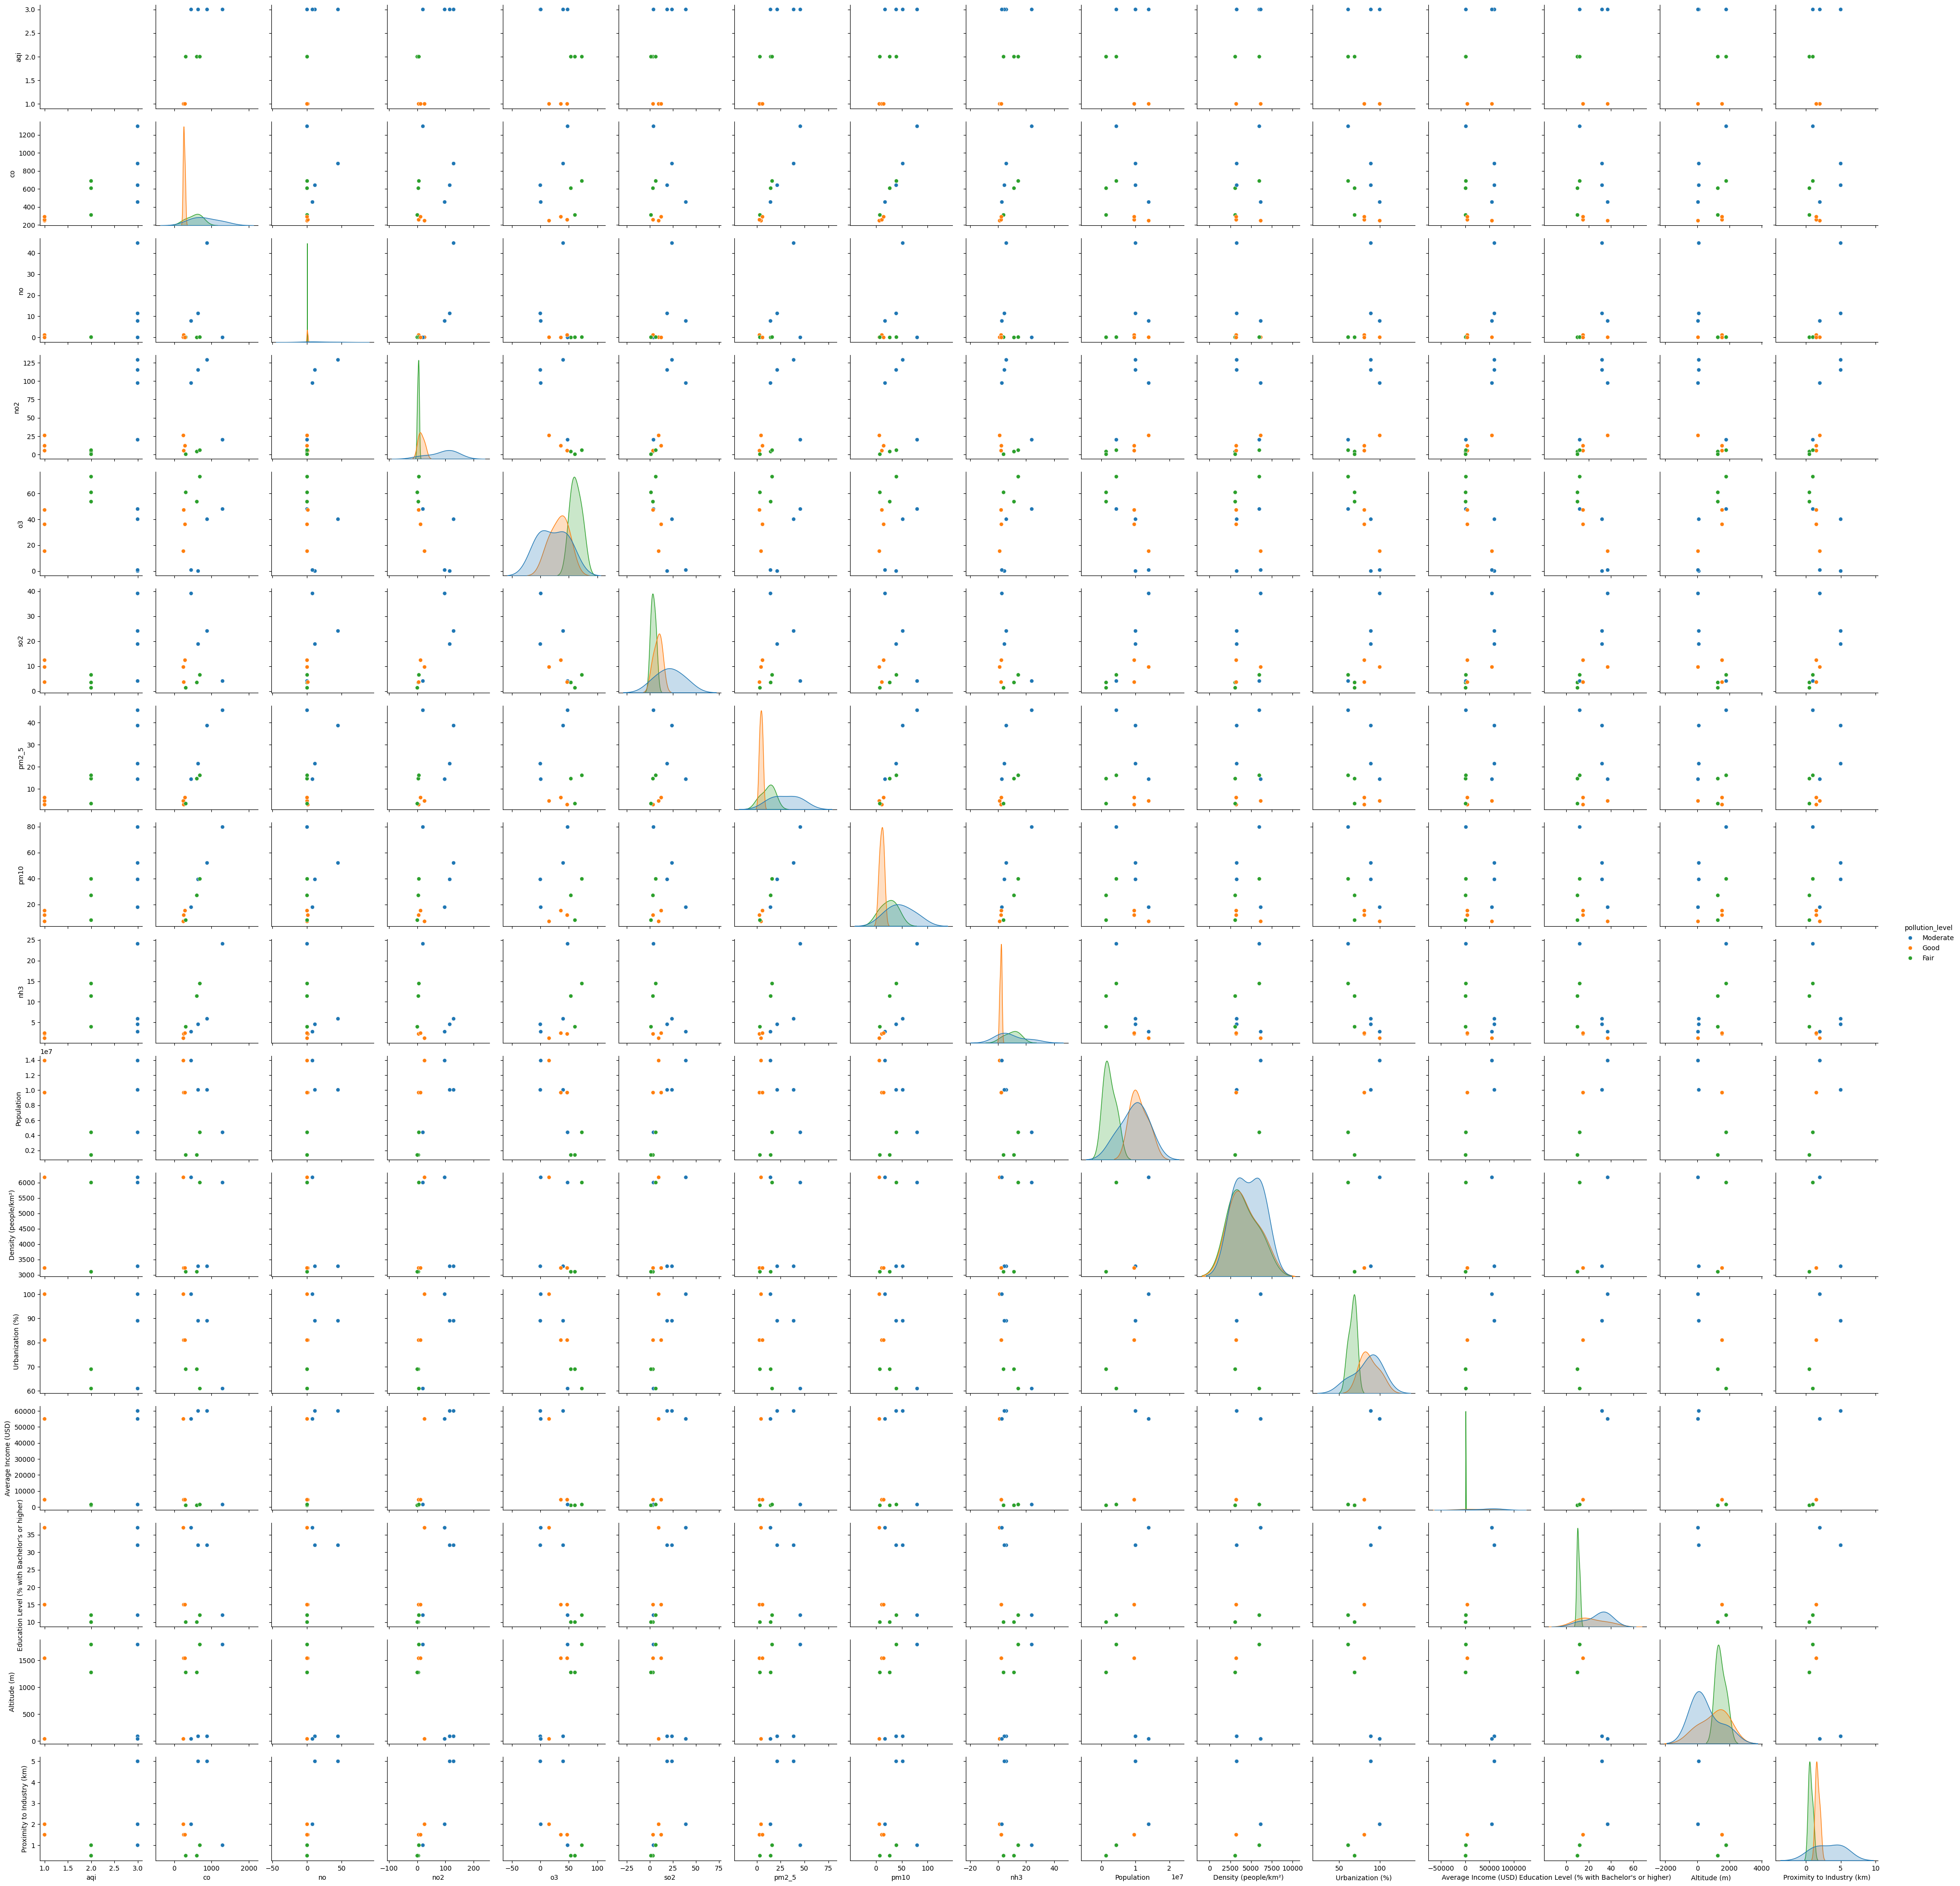

/home/tombosoa/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:                    aqi   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2.200
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.205
Time:                        13:36:07   Log-Likelihood:                -7.2579
No. Observations:                  10   AIC:                             24.52
Df Residuals:                       5   BIC:                             26.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

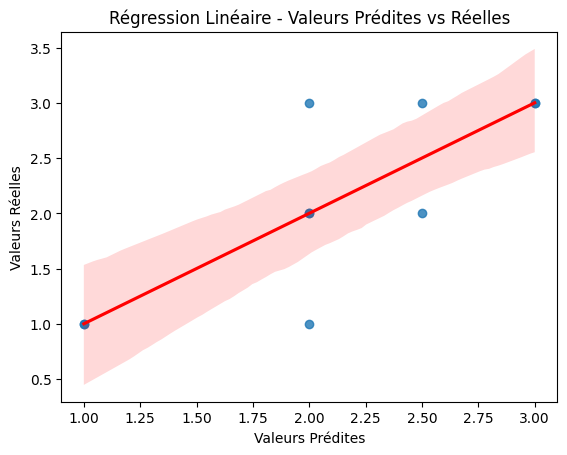

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

pollution_df = pd.read_csv('../data/processed/transformed_pollution_data.csv')
pollution_df.rename(columns={'location': 'Location'}, inplace=True)

demographic_df = pd.read_csv('../data/raw/Demographic_Data.csv')
geographic_df = pd.read_csv('../data/raw/Geographic_Data.csv')

pollution_df['date'] = pd.to_datetime(pollution_df['date'])

merged_df = pollution_df.merge(demographic_df, on='Location', how='left')
merged_df = merged_df.merge(geographic_df, on='Location', how='left')

non_numeric_columns = ['date', 'Location', 'pollution_level']

numerical_columns = [col for col in merged_df.columns if col not in non_numeric_columns]

correlation_matrix = merged_df[numerical_columns].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

sns.pairplot(merged_df, vars=numerical_columns, hue='pollution_level')
plt.show()

X = merged_df[['Population', 'Density (people/km²)', 'Urbanization (%)', 'Average Income (USD)', 'Education Level (% with Bachelor\'s or higher)', 'Altitude (m)', 'Proximity to Industry (km)']]
y = merged_df['aqi']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

sns.regplot(x=model.fittedvalues, y=y, line_kws={"color": "red"})
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Régression Linéaire - Valeurs Prédites vs Réelles')
plt.show()
